## Decision Tree Exercise

Mucun Tian

### Import labraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import tree

### Load the data in iris1.csv

In [2]:
raw_data=pd.read_csv("./data/iris1.csv")

### Train-Test

Get the features and labels

In [3]:
X = raw_data.iloc[:,0:4].values
y = raw_data.iloc[:,4].values

Perform the stratified 5-fold splits and plot the histogram for each fold

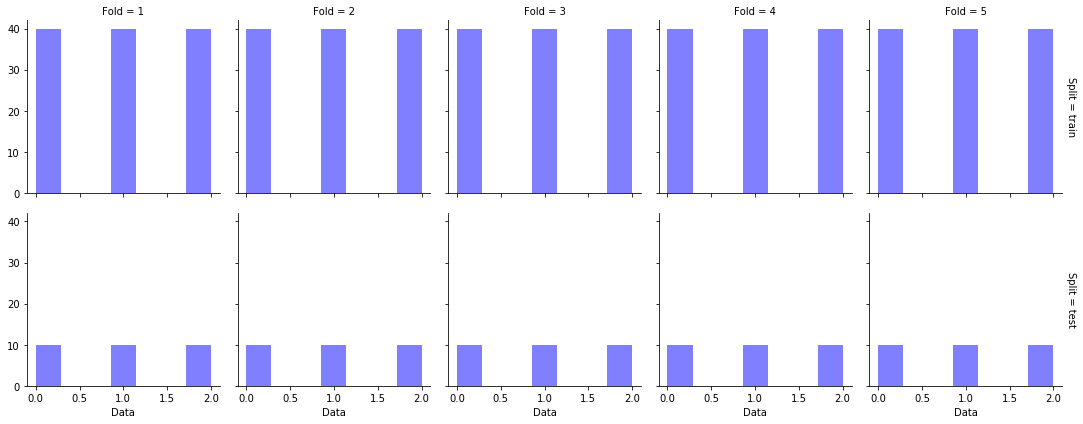

In [4]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5)
folds = []
k = 1
for train_index, test_index in kf.split(X,y):
    y_train=y[train_index]
    y_test=y[test_index]
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    c_train=le.fit_transform(y_train)
    c_test=le.fit_transform(y_test)
    
    # save data into a dataframe for plots
    df_train = pd.DataFrame()
    df_train['Data'] = c_train
    df_train['Split'] = 'train'
    df_test = pd.DataFrame()
    df_test['Data'] = c_test
    df_test['Split'] = 'test'
    df = df_train.append(df_test, ignore_index=True)
    df['Fold'] = k
    folds.append(df)
    k = k + 1
    
splits_df = pd.concat(folds, ignore_index=True)
    
import seaborn as sns
g = sns.FacetGrid(data=splits_df, row='Split', col='Fold', margin_titles=True)
g.map(plt.hist, "Data", bins=7, facecolor='blue', alpha=0.5)
plt.show()

Perform Train-Test tasks on each of the 5 folds using a classification tree

For each fold:
1. scale the independent features with mean zero and unit standard deviation
2. normalize the scaled result with the norm "l1"
3. train and test on a classification tree using the entropy to split
4. compute the accuracy which will be aggregated into the final average accuracy.

In [5]:
k = 1
accuracy_fold = []
for train_index, test_index in kf.split(X,y):
    X_train=X[train_index]
    y_train=y[train_index]
    X_test=X[test_index]
    y_test=y[test_index]
    
    # Scale features with mean zero and unit standard deviation
    sd = preprocessing.StandardScaler()
    sd.fit(X_train)
    X_train_scaled = sd.transform(X_train)
    X_test_scaled = sd.transform(X_test)
    
    # Normalize the scaled result with the norm "l1"
    normalizer = preprocessing.Normalizer(norm="l1")
    X_train_normalized = normalizer.fit_transform(X_train_scaled)
    X_test_normalized = normalizer.fit_transform(X_test_scaled)
    
    # Decision tree classifier
    dtc = tree.DecisionTreeClassifier(criterion="entropy")
    dtc = dtc.fit(X_train_normalized, y_train)
    y_pred=dtc.predict(X_test_normalized)
    y_true=y_test
    
    # calculcate the accuracy
    accuracy = 1 - np.sum(np.not_equal(y_true, y_pred)) / float(y_true.size)
    accuracy_fold.append(accuracy)
    print(k, ' fold, accuracy=', accuracy)
    k = k + 1
avg_accuracy = np.mean(accuracy_fold)
print("The average accuracy on all the 5 folds is: ", avg_accuracy)

1  fold, accuracy= 0.8
2  fold, accuracy= 0.7
3  fold, accuracy= 0.833333333333
4  fold, accuracy= 0.8
5  fold, accuracy= 0.933333333333
The average accuracy on all the 5 folds is:  0.813333333333


### Part 2

In [6]:
k = 1
accuracy_fold = []
kf_outer = StratifiedKFold(n_splits=5)
for train_index, test_index in kf_outer.split(X,y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
    kf_inner = StratifiedKFold(n_splits=3)
    
    accuracy_entropy = []
    accuracy_gini = []
    # Parameter selection
    for train_index2, test_index2 in kf_inner.split(X_train, y_train):
        
        X_train2 = X_train[train_index2]
        y_train2 = y_train[train_index2]
        X_test2 = X_train[test_index2]
        y_test2 = y_train[test_index2]
        
        # Scale features witimport seaborn as snsh mean zero and unit standard deviation
        sd = preprocessing.StandardScaler()
        sd.fit(X_train2)
        X_train2_scaled = sd.transform(X_train2)
        X_test2_scaled = sd.transform(X_test2)

        # Normalize the scaled result with the norm "l1"
        normalizer = preprocessing.Normalizer(norm="l1")
        X_train2_normalized = normalizer.fit_transform(X_train2_scaled)
        X_test2_normalized = normalizer.fit_transform(X_test2_scaled)

        # Decision tree classifier for entropy
        dtc = tree.DecisionTreeClassifier(criterion="entropy")
        dtc = dtc.fit(X_train2_normalized, y_train2)
        y_pred2=dtc.predict(X_test2_normalized)
        y_true2=y_test2

        # calculcate the accuracy
        accuracy1 = 1 - np.sum(np.not_equal(y_true2, y_pred2)) / float(y_true2.size)
        accuracy_entropy.append(accuracy1)
        
        
        # Decision tree classifier for gini
        dtc = tree.DecisionTreeClassifier(criterion="gini")
        dtc = dtc.fit(X_train2_normalized, y_train2)
        y_pred2=dtc.predict(X_test2_normalized)
        y_true2=y_test2

        # calculcate the accuracy
        accuracy2 = 1 - np.sum(np.not_equal(y_true2, y_pred2)) / float(y_true2.size)
        accuracy_gini.append(accuracy2)
        
    avg_accuracy1 = np.mean(accuracy_entropy)
    avg_accuracy2 = np.mean(accuracy_gini)
    
    print("The average accuracy for entropy on", k, " fold is: ", avg_accuracy1)
    print("The average accuracy for gini on", k, " fold is: ", avg_accuracy2)
    
    criterion_selected = "entropy"
    
    if avg_accuracy1 < avg_accuracy2:
        criterion_selected = "gini"
        
    # Scale features with mean zero and unit standard deviation
    sd = preprocessing.StandardScaler()
    sd.fit(X_train)
    X_train_scaled = sd.transform(X_train)
    X_test_scaled = sd.transform(X_test)
    
    # Normalize the scaled result with the norm "l1"
    normalizer = preprocessing.Normalizer(norm="l1")
    X_train_normalized = normalizer.fit_transform(X_train_scaled)
    X_test_normalized = normalizer.fit_transform(X_test_scaled)
    
    # Decision tree classifier using the selected criterion
    print(criterion_selected + " is selected")
    dtc = tree.DecisionTreeClassifier(criterion=criterion_selected)
    dtc = dtc.fit(X_train_normalized, y_train)
    y_pred=dtc.predict(X_test_normalized)
    y_true=y_test
    
    # calculcate the accuracy
    accuracy = 1 - np.sum(np.not_equal(y_true, y_pred)) / float(y_true.size)
    accuracy_fold.append(accuracy)
    print(k, ' fold, accuracy=', accuracy, "using " + criterion_selected)
    k = k + 1
    
avg_accuracy = np.mean(accuracy_fold)
print("The average accuracy on all the 5 folds is: ", avg_accuracy)

The average accuracy for entropy on 1  fold is:  0.784493284493
The average accuracy for gini on 1  fold is:  0.833333333333
gini is selected
1  fold, accuracy= 0.766666666667 using gini
The average accuracy for entropy on 2  fold is:  0.767399267399
The average accuracy for gini on 2  fold is:  0.798534798535
gini is selected
2  fold, accuracy= 0.8 using gini
The average accuracy for entropy on 3  fold is:  0.825396825397
The average accuracy for gini on 3  fold is:  0.858363858364
gini is selected
3  fold, accuracy= 0.8 using gini
The average accuracy for entropy on 4  fold is:  0.858363858364
The average accuracy for gini on 4  fold is:  0.824175824176
entropy is selected
4  fold, accuracy= 0.833333333333 using entropy
The average accuracy for entropy on 5  fold is:  0.790598290598
The average accuracy for gini on 5  fold is:  0.764346764347
entropy is selected
5  fold, accuracy= 0.933333333333 using entropy
The average accuracy on all the 5 folds is:  0.826666666667
